In [2]:
# importing neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1) Loading the data set

In [4]:
# loading data
df=pd.read_csv('inflation data.csv')
# head of dataset
df.head()

,YEARS,ANNUAL GDP GROWTH RATES(%),AVARAGE ANNUAL EXCHANGE RATES (KSHS vs USD),ANNUAL CPI RATES(%),ANNUAL INTEREST(LENDING) RATES(%),ANNUAL INFLATION RATES (%)
0,1971.0,22.17,7.14,0.93,9.0,3.78
1,1972.0,17.08,7.14,0.98,9.0,5.83
2,1973.0,5.90,7.00,1.07,9.0,9.28
3,1974.0,4.07,7.14,1.26,9.5,17.81
4,1975.0,0.88,7.34,1.50,10.0,19.12


# 2) Understanding the dateset

In [6]:
# tail of the dataset
df.tail()

,YEARS,ANNUAL GDP GROWTH RATES(%),AVARAGE ANNUAL EXCHANGE RATES (KSHS vs USD),ANNUAL CPI RATES(%),ANNUAL INTEREST(LENDING) RATES(%),ANNUAL INFLATION RATES (%)
49,2020.0,-0.27,106.45,200.23,12.00,5.40
50,2021.0,7.59,109.64,212.47,12.08,6.11
51,2022.0,4.85,117.87,228.74,12.34,7.66
52,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# dropping last 2 rows since they are nan values
df.drop([52,53], inplace=True)

In [8]:
# renaming column name
df.rename(columns={df.columns[1]:'Growth_Rates', df.columns[2]:'Exchange_Rates',df.columns[3]:'CPI_Rates',df.columns[4]:'Lending_rates',df.columns[5]:'Inflation_rates'}, inplace=True)

In [9]:
df.head(2)

,YEARS,Growth_Rates,Exchange_Rates,CPI_Rates,Lending_rates,Inflation_rates
0,1971.0,22.17,7.14,0.93,9.0,3.78
1,1972.0,17.08,7.14,0.98,9.0,5.83


In [10]:
# stracture of the dataframe
df.shape

(52, 6)

In [11]:
# data types of each column
df.dtypes

YEARS              float64
Growth_Rates       float64
Exchange_Rates     float64
CPI_Rates          float64
Lending_rates      float64
Inflation_rates    float64
dtype: object

In [12]:
# column names 
df.columns

Index(['YEARS', 'Growth_Rates', 'Exchange_Rates', 'CPI_Rates', 'Lending_rates',
       'Inflation_rates'],
      dtype='object')

In [13]:
#describe the numeric columns of the dataset 
df.describe()

,YEARS,Growth_Rates,Exchange_Rates,CPI_Rates,Lending_rates,Inflation_rates
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1996.500000,4.599423,52.343654,57.376538,16.301923,11.505962
std,15.154757,3.875853,36.625405,67.618047,6.524063,7.880084
min,1971.000000,-0.800000,7.000000,0.930000,9.000000,1.550000
25%,1983.750000,2.270000,14.135000,4.472500,12.400000,6.252500
50%,1996.500000,4.255000,58.365000,29.125000,14.395000,9.790000
75%,2009.250000,5.902500,79.185000,97.142500,18.525000,13.900000
max,2022.000000,22.170000,117.870000,228.740000,36.240000,45.980000


In [14]:
# more info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEARS            52 non-null     float64
 1   Growth_Rates     52 non-null     float64
 2   Exchange_Rates   52 non-null     float64
 3   CPI_Rates        52 non-null     float64
 4   Lending_rates    52 non-null     float64
 5   Inflation_rates  52 non-null     float64
dtypes: float64(6)
memory usage: 2.6 KB


In [15]:
# checking missing value
df.isnull().sum()

YEARS              0
Growth_Rates       0
Exchange_Rates     0
CPI_Rates          0
Lending_rates      0
Inflation_rates    0
dtype: int64

## Data Visualization 

array([[<Axes: title={'center': 'YEARS'}>,
        <Axes: title={'center': 'Growth_Rates'}>],
       [<Axes: title={'center': 'Exchange_Rates'}>,
        <Axes: title={'center': 'CPI_Rates'}>],
       [<Axes: title={'center': 'Lending_rates'}>,
        <Axes: title={'center': 'Inflation_rates'}>]], dtype=object)

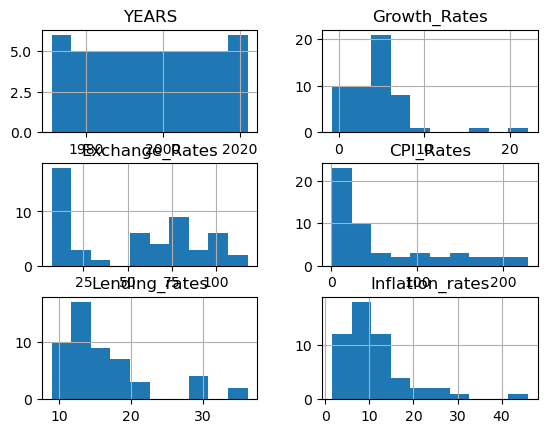

In [17]:
# histogram
df.hist()

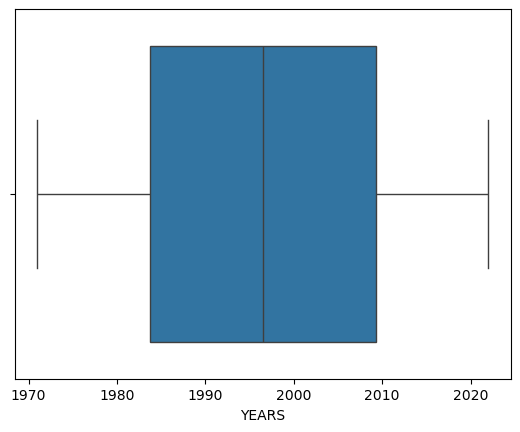

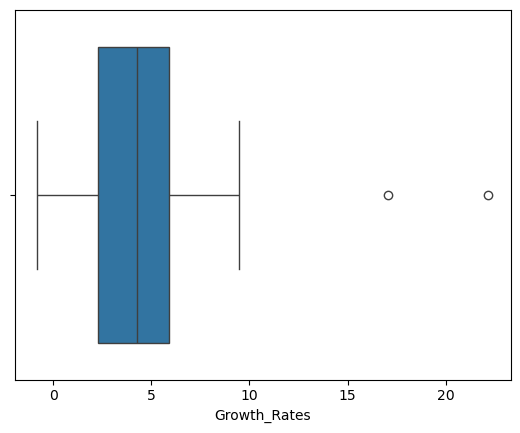

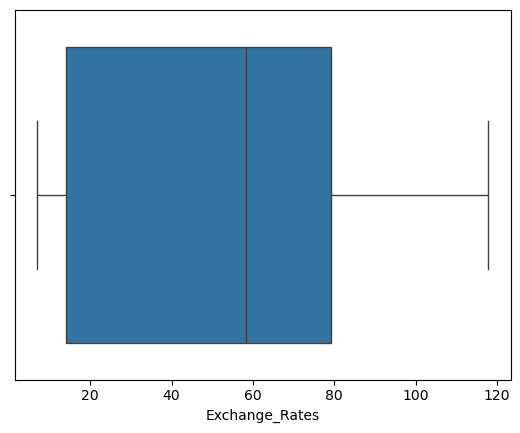

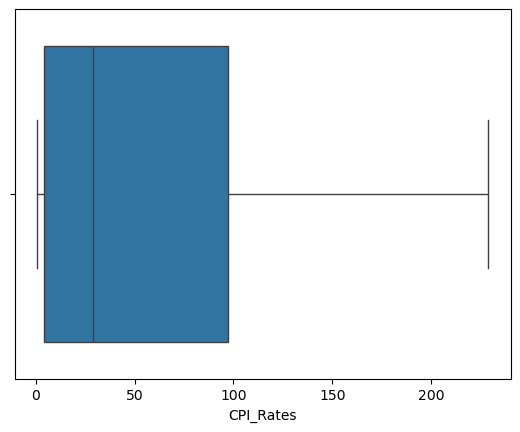

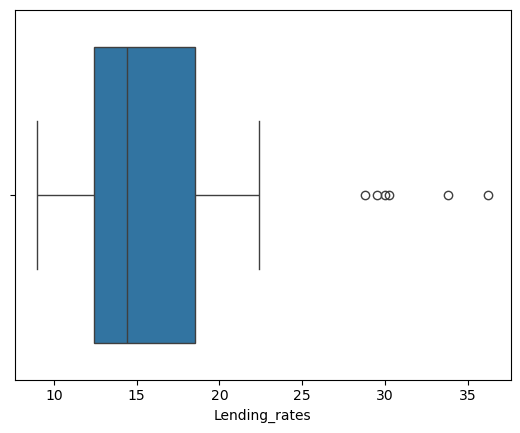

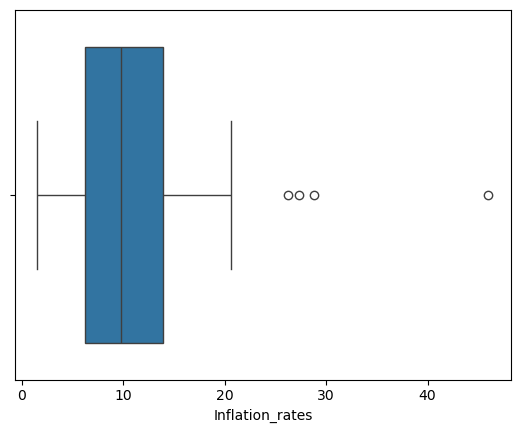

In [18]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.show()

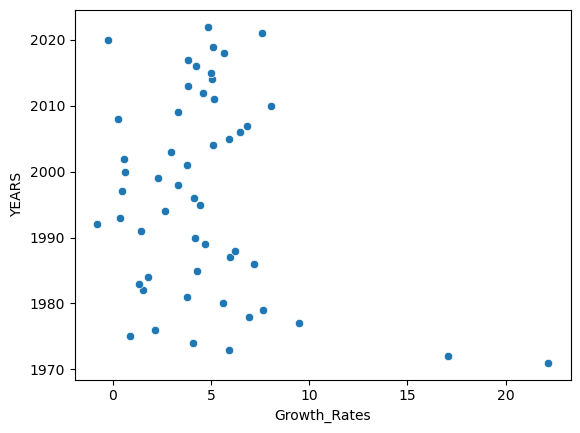

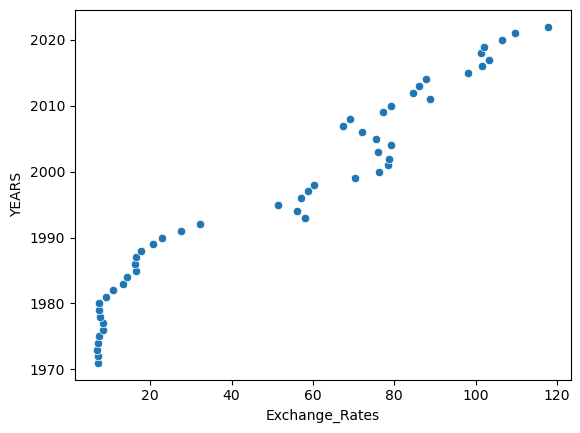

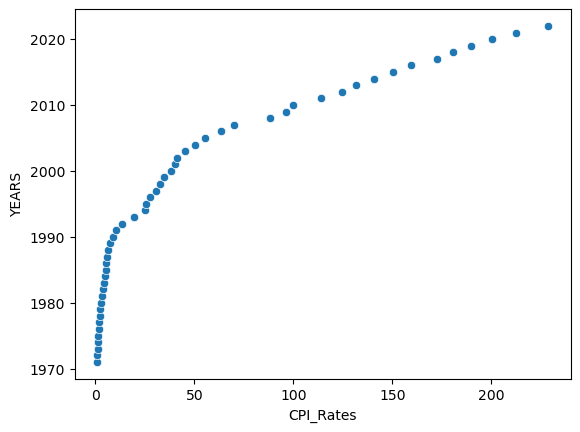

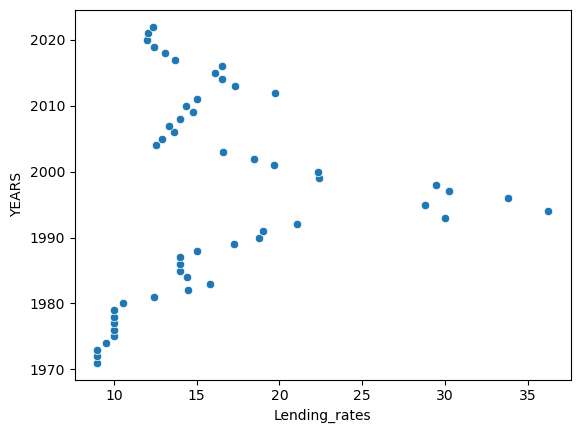

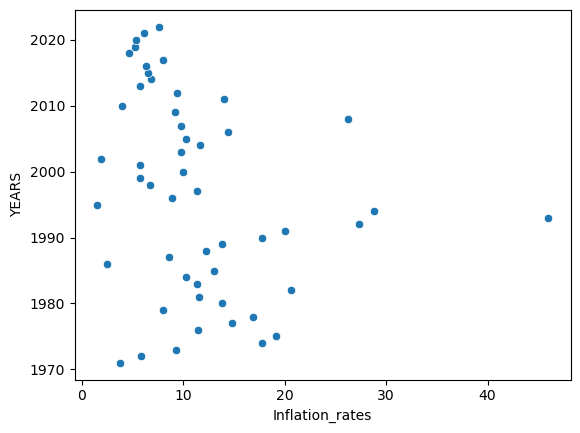

In [19]:
for i in [ 'Growth_Rates', 'Exchange_Rates', 'CPI_Rates', 'Lending_rates',
       'Inflation_rates']:
    sns.scatterplot(data=df, x=i, y='YEARS')
    plt.show()

# 3) Linear regression Model

In [21]:
# selecting feature and target value
y=df[['Inflation_rates']] # target variable
X=df[['CPI_Rates']]  # feature

In [22]:
# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# create the model
model = LinearRegression()

In [24]:
# train the model 
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# make prediction  
y_pred = model.predict(X_test)

In [26]:
# Get the slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope (m) : {slope}")
print(f"Intercept (b) : {intercept}")

Slope (m) : [-0.03664801]
Intercept (b) : [13.73220784]


In [27]:
# Displaying the regression coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Creating a DataFrame for better visualization
# Check the shape of coefficients and adjust the DataFrame creation accordingly
if len(coefficients) == 4:  # When there are four features
    coef_df = pd.DataFrame(coefficients, index=['Growth_Rates', 'Exchange_Rates', 'CPI_Rates', 'Lending_rates'], columns=['Coefficient'])
    coef_df['Intercept'] = intercept
else:  # Fallback in case the coefficients do not match the expected shape
    coef_df = pd.DataFrame(coefficients, columns=['Coefficient'])
    coef_df['Intercept'] = intercept

# Display the DataFrame
print(coef_df)


   Coefficient  Intercept
0    -0.036648  13.732208


# Testing

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Model evaluation
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

# Applying polynomial features and scaling
poly = PolynomialFeatures(degree=2, include_bias=False)
scaler = StandardScaler()

# Creating a pipeline with polynomial features, scaling, and Ridge regression
model = make_pipeline(poly, scaler, Ridge(alpha=1.0))

# Training the model with the original training data
model.fit(X_train, y_train)

# Predicting the values on the testing set
y_test_pred = model.predict(X_test)

# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
accuracy = 100 - mape

# Printing the improved results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Percentage Accuracy: {accuracy:.2f}%")


Mean Absolute Error (MAE): 2.21
Mean Squared Error (MSE): 6.67
Root Mean Squared Error (RMSE): 2.58
R-squared (R²): 0.59
Mean Absolute Percentage Error (MAPE): 21.43%
Percentage Accuracy: 78.57%


In [30]:
# Get input from the user
# Convert to float for consistency
CPI_Rates = float(input("Enter the CPI: "))

# Create a dictionary with input values

input_data = {
    'CPI_Rates': [CPI_Rates]
}

# Convert the dictionary to a DataFrame and then access the values
input_df = pd.DataFrame.from_dict(input_data)

# Predict using the model
y=13.732207843798992+(-0.03664800543070505*CPI_Rates)
print("The annual inflation rate is : ",y)

Enter the CPI:  0.1


The annual inflation rate is :  13.728543043255922


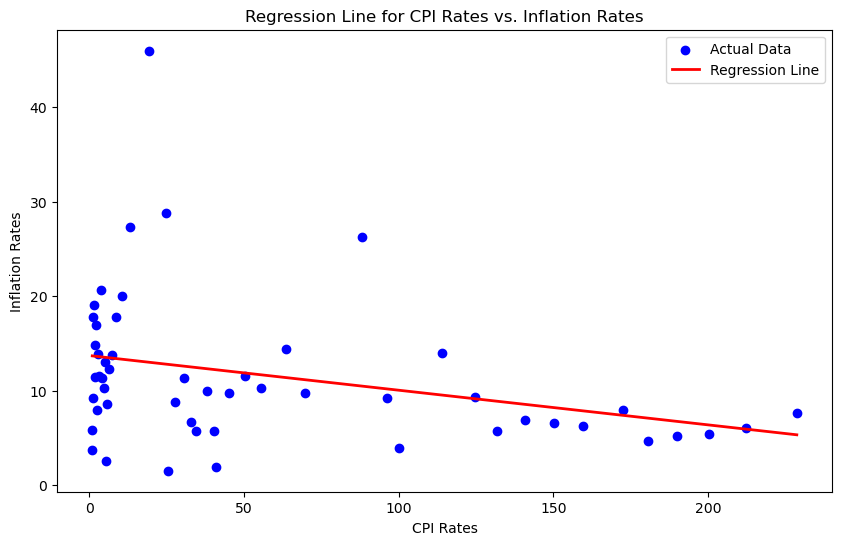

In [31]:
import matplotlib.pyplot as plt

# Plotting the regression line along with the data points
plt.figure(figsize=(10, 6))

# Scatter plot of the actual data
plt.scatter(df['CPI_Rates'], df['Inflation_rates'], color='blue', label='Actual Data')

# Generating values for the regression line
regression_line = 13.732207843798992 + (-0.03664800543070505 * df['CPI_Rates'])

# Plotting the regression line
plt.plot(df['CPI_Rates'], regression_line, color='red', linewidth=2, label='Regression Line')

# Labels and title
plt.xlabel('CPI Rates')
plt.ylabel('Inflation Rates')
plt.title('Regression Line for CPI Rates vs. Inflation Rates')
plt.legend()
plt.show()


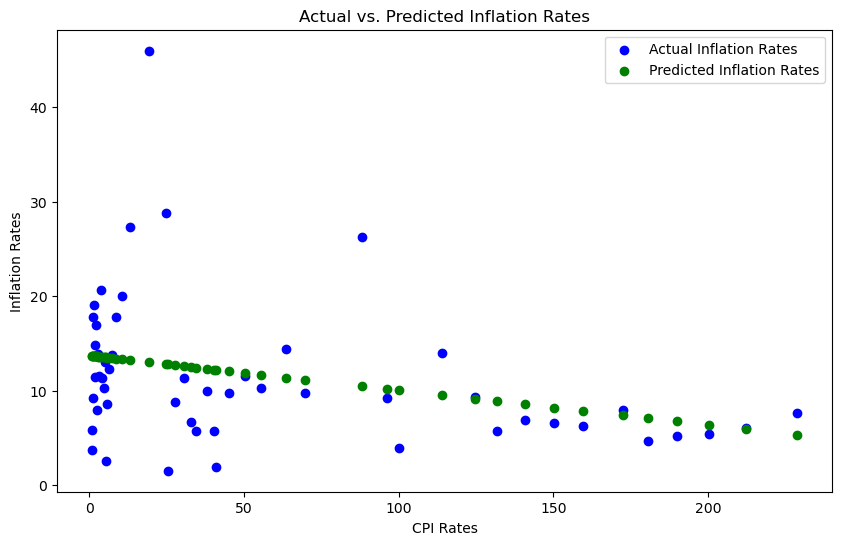

In [32]:
import matplotlib.pyplot as plt

# Plotting actual vs. predicted inflation rates
plt.figure(figsize=(10, 6))

# Predicting inflation rates using the model
predicted_inflation = 13.732207843798992 + (-0.03664800543070505 * df['CPI_Rates'])

# Scatter plot of actual inflation rates
plt.scatter(df['CPI_Rates'], df['Inflation_rates'], color='blue', label='Actual Inflation Rates')

# Scatter plot of predicted inflation rates
plt.scatter(df['CPI_Rates'], predicted_inflation, color='green', label='Predicted Inflation Rates')

# Adding labels and title
plt.xlabel('CPI Rates')
plt.ylabel('Inflation Rates')
plt.title('Actual vs. Predicted Inflation Rates')
plt.legend()
plt.show()


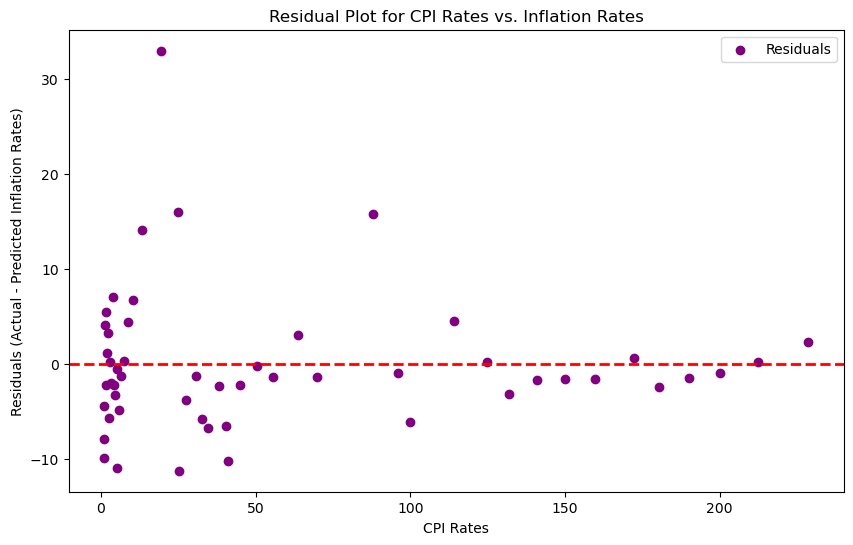

In [33]:
import matplotlib.pyplot as plt

# Calculating residuals (difference between actual and predicted values)
residuals = df['Inflation_rates'] - predicted_inflation

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(df['CPI_Rates'], residuals, color='purple', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Horizontal line at y=0 for reference

# Adding labels and title
plt.xlabel('CPI Rates')
plt.ylabel('Residuals (Actual - Predicted Inflation Rates)')
plt.title('Residual Plot for CPI Rates vs. Inflation Rates')
plt.legend()
plt.show()


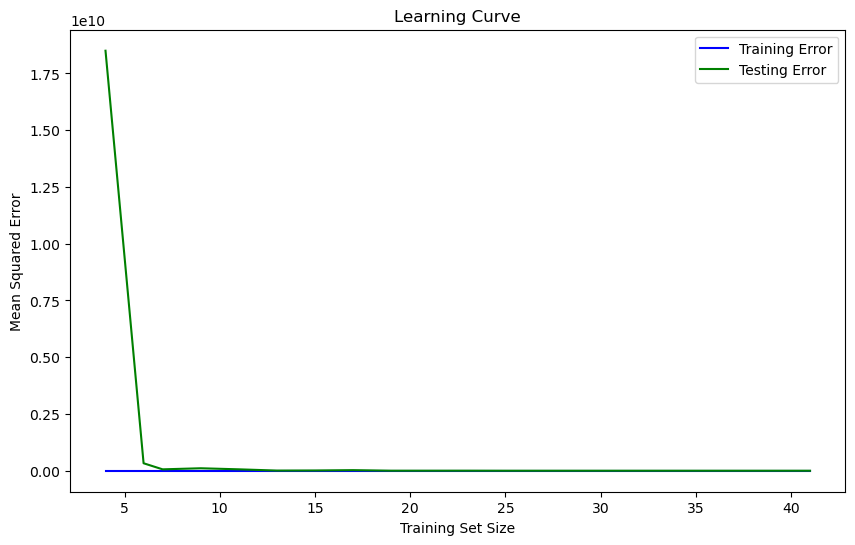

In [34]:
import numpy as np  # Import numpy for numerical operations
from sklearn.model_selection import learning_curve

# Ensure X and y are properly defined
# X should be the features (CPI_Rates), and y should be the target (Inflation_rates)
X = df[['CPI_Rates']]
y = df['Inflation_rates']

# Calculate the learning curve with fewer training sizes to avoid duplicates
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 20))

# Calculate the mean training and testing errors
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Testing Error', color='green')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


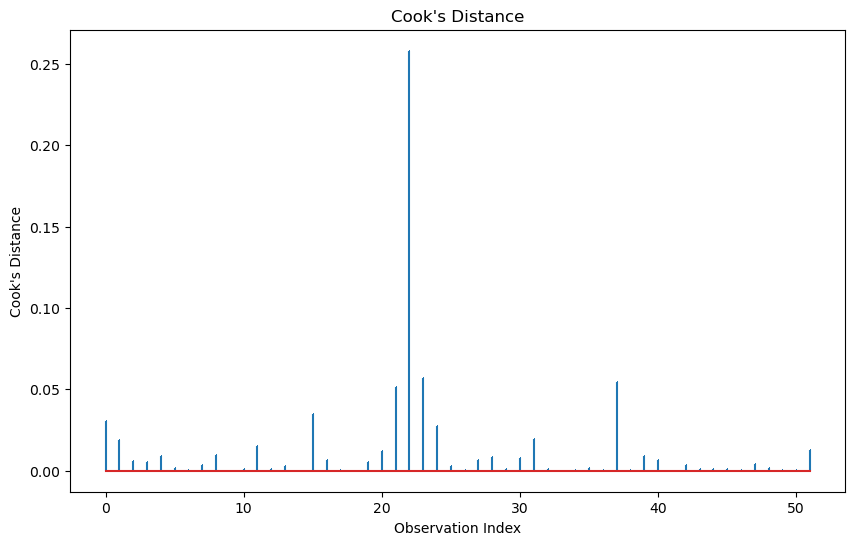

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Fit the model using statsmodels
model_fit = sm.OLS(y, sm.add_constant(X)).fit()
influence = model_fit.get_influence()
cooks = influence.cooks_distance[0]

# Plotting Cook's Distance
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks)), cooks, markerfmt=",")
plt.title("Cook's Distance")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.show()


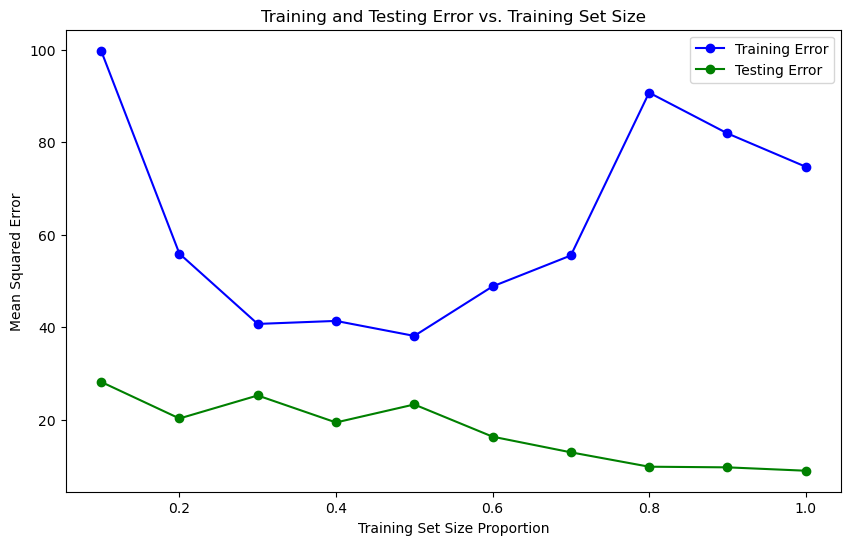

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined as features and target
X = df[['CPI_Rates']]  # Features
y = df['Inflation_rates']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

training_errors = []
testing_errors = []

# Fit the model with increasing amounts of training data to visualize overfitting
training_sizes = np.linspace(0.1, 1.0, 10)
for training_size in training_sizes:
    # Select a subset of the training data
    subset_size = int(training_size * len(X_train))
    X_train_subset = X_train[:subset_size]
    y_train_subset = y_train[:subset_size]
    
    # Train the linear regression model on the subset
    model.fit(X_train_subset, y_train_subset)
    
    # Predict on the training subset and calculate the training error
    y_train_pred = model.predict(X_train_subset)
    training_error = mean_squared_error(y_train_subset, y_train_pred)
    training_errors.append(training_error)
    
    # Predict on the testing set and calculate the testing error
    y_test_pred = model.predict(X_test)
    testing_error = mean_squared_error(y_test, y_test_pred)
    testing_errors.append(testing_error)

# Plotting the training and testing errors
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, training_errors, label='Training Error', marker='o', color='blue')
plt.plot(training_sizes, testing_errors, label='Testing Error', marker='o', color='green')
plt.title('Training and Testing Error vs. Training Set Size')
plt.xlabel('Training Set Size Proportion')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()
